In [145]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set()

In [146]:
arr = np.arange(1,10)

def benfords_law(arr):
    p_first_digit = np.log10(1 + 1 / arr)
    return p_first_digit

In [147]:
benfords_law(arr)

array([0.30103   , 0.17609126, 0.12493874, 0.09691001, 0.07918125,
       0.06694679, 0.05799195, 0.05115252, 0.04575749])

In [148]:
def rel_freq(arr):
    freq = pd.Series(arr.astype(str)).apply(lambda x : x[0]).astype(int).value_counts() 
    return freq / freq.sum()

In [149]:
rel_freq(np.array([1,1,1,1,2,2,2,3,3,4]))

1    0.4
2    0.3
3    0.2
4    0.1
dtype: float64

In [150]:
table = pd.read_html('https://data.val.se/val/val2018/slutresultat/R/rike/index.html')
table3 = table[3][:-6]
vote_2018_first_digit_count = table3['Antal2018'].astype(str).apply(lambda x : x[0]).astype(int).value_counts()
vote_2018_freq = vote_2018_first_digit_count / vote_2018_first_digit_count.sum()
vote_2018_freq.sort_index(inplace=True)

In [151]:
vote_2018_first_digit_count

1    3
5    2
2    2
6    1
4    1
3    1
Name: Antal2018, dtype: int64

In [152]:
table3

,Förk.,Parti,Antal2018,Andel2018,Antal+/-,Andel+/-,Antal2014,Andel2014
0,M,Moderaterna,1284698,"19,84%",-168819,-349,1453517.0,"23,33%"
1,C,Centerpartiet,557500,"8,61%",176563,"+2,49",380937.0,"6,11%"
2,L,Liberalerna (tidigare Folkpartiet),355546,"5,49%",17773,"+0,07",337773.0,"5,42%"
3,KD,Kristdemokraterna,409478,"6,32%",124672,"+1,75",284806.0,"4,57%"
4,S,Arbetarepartiet-Socialdemokraterna,1830386,"28,26%",-102325,-275,1932711.0,"31,01%"
5,V,Vänsterpartiet,518454,"8,00%",162123,"+2,29",356331.0,"5,72%"
6,MP,Miljöpartiet de gröna,285899,"4,41%",-143376,-247,429275.0,"6,89%"
7,SD,Sverigedemokraterna,1135627,"17,53%",334449,"+4,68",801178.0,"12,86%"
8,FI,Feministiskt initiativ,29665,"0,46%",-165054,-267,194719.0,"3,12%"
9,ÖVR,Övriga anmälda partier,69472,"1,07%",9146,"+0,10",60326.0,"0,97%"


In [153]:
vote_2018_freq

1    0.3
2    0.2
3    0.1
4    0.1
5    0.2
6    0.1
Name: Antal2018, dtype: float64

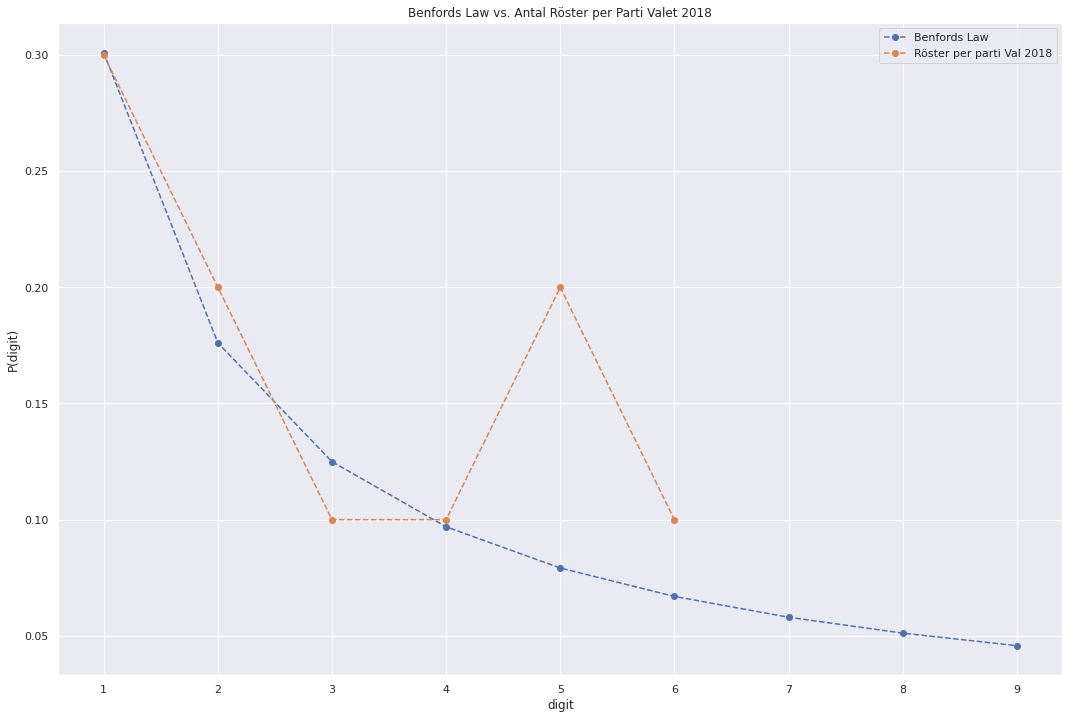

In [154]:
benford_dist = benfords_law(arr)
fig = plt.figure(figsize=(18,12))

plt.title('Benfords Law vs. Antal Röster per Parti Valet 2018')
plt.plot(arr,benford_dist,ls='dashed',marker='o',label='Benfords Law')
plt.plot(vote_2018_freq.index,vote_2018_freq,label='Röster per parti Val 2018',ls='dashed',marker='o')
plt.legend(loc='upper right')
plt.ylabel('P(digit)')
plt.xlabel('digit')

plt.savefig('benfords_law_val_2018.jpg',format='jpg')

In [165]:
fhm_daily_dead = pd.read_pickle('fhm_daily_positive.pkl')
fhm_daily_dead = fhm_daily_dead.loc[fhm_daily_dead['Totalt_antal_fall'] > 0]
fhm_daily_dead

,Totalt_antal_fall
Statistikdatum,
2020-02-04,1
2020-02-26,1
2020-02-27,1
2020-02-28,8
2020-02-29,3
...,...
2022-01-20,43721
2022-01-21,39811
2022-01-22,37719


In [167]:
fhm_daily_dead_freq = rel_freq(fhm_daily_dead['Totalt_antal_fall'])
fhm_daily_dead_freq

1    0.235209
2    0.163059
3    0.138528
4    0.119769
6    0.098124
7    0.083694
5    0.082251
8    0.050505
9    0.028860
Name: Totalt_antal_fall, dtype: float64

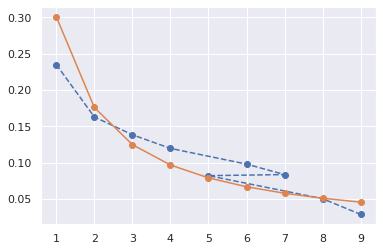

In [169]:
ax = fhm_daily_dead_freq.plot(ls='dashed',marker='o')
ax.plot(arr,benford_dist,marker='o')